In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
%matplotlib inline

In [ ]:
df = pd.read_csv("data/fec/1326070.csv", dtype=str, skiprows=1)

In [ ]:
df.head()

In [22]:
sa_columns = ["form_type", "filer_committee_id_number", "transaction_id", "back_reference_tran_id_number", "back_reference_sched_name", "entity_type", "contributor_organization_name", "contributor_last_name", "contributor_first_name", "contributor_middle_name", "contributor_prefix", "contributor_suffix", "contributor_street_1", "contributor_street_2", "contributor_city", "contributor_state", "contributor_zip_code", "election_code", "election_other_description", "contribution_date", "contribution_amount", "contribution_aggregate", "contribution_purpose_descrip", "contributor_employer", "contributor_occupation", "donor_committee_fec_id", "donor_committee_name", "donor_candidate_fec_id", "donor_candidate_last_name", "donor_candidate_first_name", "donor_candidate_middle_name", "donor_candidate_prefix", "donor_candidate_suffix", "donor_candidate_office", "donor_candidate_state", "donor_candidate_district", "conduit_name", "conduit_street1", "conduit_street2", "conduit_city", "conduit_state", "conduit_zip_code", "memo_code", "memo_text_description", "reference_code"]

In [ ]:
df = df.iloc[2:,:len(sa_columns)]
df.columns = sa_columns

In [ ]:
df.form_type.unique()

In [ ]:
df.loc[(df.form_type == "SA17A") & (df.entity_type == "IND"), df.columns.str.contains("entity_type|contributor|contribution")].head()

In [ ]:
df.loc[(df.form_type == "SA17A") & (df.entity_type == "IND"), "contributor_zip_code"].str[0:5].nunique()

In [ ]:
df2 = pd.read_csv("data/fec/1340943.csv", dtype=str, skiprows=1)
df2 = df2.iloc[2:,:len(sa_columns)]
df2.columns = sa_columns
df2.loc[(df2.form_type == "SA17A") & (df2.entity_type == "IND"), "contributor_zip_code"].str[0:5].nunique()

In [ ]:
np.unique(np.concatenate((df.loc[(df.form_type == "SA17A") & (df.entity_type == "IND"), "contributor_zip_code"].str[0:5].unique(),  df2.loc[(df2.form_type == "SA17A") & (df2.entity_type == "IND"), "contributor_zip_code"].str[0:5].unique()))).shape

In [4]:
# https://www.fec.gov/data/elections/president/2020/
pres_candidates = pd.read_csv("data/fec/elections-2019-08-18T13_16_33.csv")
pres_candidates.head()

,candidate_id,candidate_election_year,candidate_name,party_full,incumbent_challenge_full,office,total_receipts,total_disbursements,cash_on_hand_end_period,committee_ids,coverage_end_date,candidate_pcc_id,candidate_pcc_name
0,P00000679,2020,"CARROLL, JERRY LEON",NONE,Challenger,P,200.0,200.0,2.0,{C00214999},2019-06-30 00:00:00,C00214999,JERRY CARROLL COMMITTEE FOR PRESIDENT
1,P00003244,2020,"WINTERBOTTOM, THOMAS FRANCIS",DEMOCRATIC PARTY,Challenger,P,0.0,0.0,0.0,{C00549923},NaN,C00549923,THOMAS F WINTERBOTTOM FOR PRESIDENT
2,P00003814,2020,"MALONE, YEHANNA JOAN M M",REPUBLICAN PARTY,Challenger,P,0.0,0.0,0.0,{C00691121},NaN,C00691121,JOAN MALONE FOR PRESIDENT
3,P00003897,2020,"WALLACE, WILLIAM LEONARD",INDEPENDENT,Open seat,P,0.0,0.0,0.0,"{C00577791,C00696013}",NaN,C00696013,WALLACE 2020
4,P00003962,2020,"SCHRINER, JOSEPH CHARLES",UNKNOWN,Open seat,P,2715.0,2905.0,10.0,{C00385153},2019-06-30 00:00:00,C00385153,SCHRINER PRESIDENTIAL ELECTION COMMITTEE


In [17]:
pres_candidates.loc[pres_candidates.party_full == "DEMOCRATIC PARTY", ["candidate_name", "total_receipts", "candidate_pcc_id"]].sort_values("total_receipts", ascending=False).head(25)

,candidate_name,total_receipts,candidate_pcc_id
443,"SANDERS, BERNARD",46491503.24,C00696948
199,"WARREN, ELIZABETH",35654983.51,C00693234
238,"BUTTIGIEG, PETE",32337553.74,C00697441
49,"DELANEY, JOHN K.",26329775.98,C00508416
188,"HARRIS, KAMALA D.",25090947.58,C00694455
485,"BIDEN, JOSEPH R JR",22043828.95,C00703975
185,"GILLIBRAND, KIRSTEN",14899167.24,C00694018
263,"O'ROURKE, ROBERT BETO",13638614.48,C00699090
497,"KLOBUCHAR, AMY J.",12710254.28,C00696419
210,"BOOKER, CORY A.",12470614.53,C00695510


In [28]:
pccs = {
    "C00696948": "Bernie Sanders",
    "C00693234": "Elizabeth Warren",
    "C00697441": "Pete Buttigieg",
    "C00508416": "John Delaney",
    "C00694455": "Kamala Harris",
    "C00703975": "Joe Biden",
    "C00694018": "Kirsten Gillibrand",
    "C00699090": "Beto O'Rourke",
    "C00696419": "Amy Klobuchar",
    "C00695510": "Cory Booker",
    "C00693713": "Tulsi Gabbard",
    "C00698050": "Jay Inslee",
    "C00659938": "Andrew Yang",
    "C00693044": "Julián Castro",
    "C00705186": "Michael Bennet",
    "C00698258": "John Hickenlooper",
    "C00696054": "Marianne Williamson",
    "C00706416": "Steve Bullock",
    "C00704510": "Seth Moulton",
    "C00706697": "Bill de Blasio",
    "C00701979": "Tim Ryan",
}

In [24]:
ab = pd.read_csv("data/fec/1344765.csv", dtype=str, skiprows=1, nrows=1000)
ab = ab.iloc[2:,:len(sa_columns)]
ab.columns = sa_columns
ab.head()

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
2,SA11AI,C00401224,SA11AI_001,NaN,NaN,IND,NaN,Maloney,Gerald,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SA11AI,C00401224,SA11AI_002,NaN,NaN,ORG,Susan Pope Hays,NaN,Susan Pope Hays,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA11AI,C00401224,SA11AI_003,NaN,NaN,IND,NaN,Cassidy,William,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SA11AI,C00401224,SA11AI_004,NaN,NaN,ORG,Lee Quintanar,NaN,Lee Quintanar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SA11AI,C00401224,SA11AI_005,NaN,NaN,ORG,Elizabeth A Juarez,NaN,Elizabeth A Juarez,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ab[ab.memo_text_description.notna()].memo_text_description.tail(20)

980                Earmarked for BERNIE 2020 (C00696948)
981                Earmarked for BERNIE 2020 (C00696948)
982                              Contribution to ActBlue
983                Earmarked for BERNIE 2020 (C00696948)
984                Earmarked for BERNIE 2020 (C00696948)
985                              Contribution to ActBlue
986                Earmarked for BERNIE 2020 (C00696948)
987                              Contribution to ActBlue
988                Earmarked for BERNIE 2020 (C00696948)
989                Earmarked for BERNIE 2020 (C00696948)
990                Earmarked for BERNIE 2020 (C00696948)
991                              Contribution to ActBlue
992    Earmarked for KAMALA HARRIS FOR THE PEOPLE (C0...
993    Earmarked for KAMALA HARRIS FOR THE PEOPLE (C0...
994    Earmarked for KAMALA HARRIS FOR THE PEOPLE (C0...
995      Earmarked for PETE FOR AMERICA, INC (C00697441)
996                Earmarked for BERNIE 2020 (C00696948)
997                Earmarked fo

In [59]:
ab_iterator = pd.read_csv("data/fec/1344765.csv", dtype=str, skiprows=4, header=None, names=sa_columns, chunksize=1000000)

In [60]:
candidates = []
regex = "Earmarked for.*({})".format("|".join(pccs.keys()))
count = 0
for df in ab_iterator:
    fec_ids = df.memo_text_description.fillna("").str.extract(regex, expand=False)
    df = df.loc[fec_ids.notna(), df.columns.str.contains("_type|contribu")]
    df["fec_id"] = fec_ids.dropna()
    candidates.append(df)
    count += 1
    
candidates_df = pd.concat(candidates)
for g, data in candidates_df.groupby("fec_id"):
    data.loc[:,data.columns != "fec_id"].to_csv("data/fec/{}.csv".format(g), index=False)

AttributeError: 'list' object has no attribute 'groupby'

In [126]:
zcta = gpd.read_file("data/zcta/cb_2018_us_zcta510_500k.shp")
#zcta[~zcta.ZCTA5CE10.str.contains("96[2-9].{2}|96799|99[5-9].{2}|00[6-9].{2}")].plot()
nv_zcta = zcta.loc[zcta.ZCTA5CE10.str.contains("889.{2}|89[0-9].{2}")]
nevada = gpd.read_file("data/tracts/cb_2018_32_tract_500k.shp")

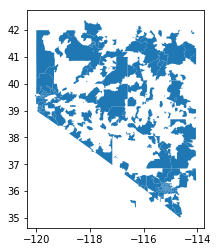

In [100]:
nv_zcta.plot()

In [127]:
def kmsq(gdf):
    return gdf.to_crs({'init': 'epsg:3857'}).geometry.area/ 10**6

nevada['tract_area'] = kmsq(nevada)
nv_zcta['zip_area'] = kmsq(nv_zcta)

c:\python27\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
intersection = gpd.overlay(nv_zcta, nevada, how="intersection", use_sindex=True)
intersection.crs = nevada.crs
intersection2 = intersection.dissolve(by=list(intersection.columns[:-1]), aggfunc='sum').reset_index()

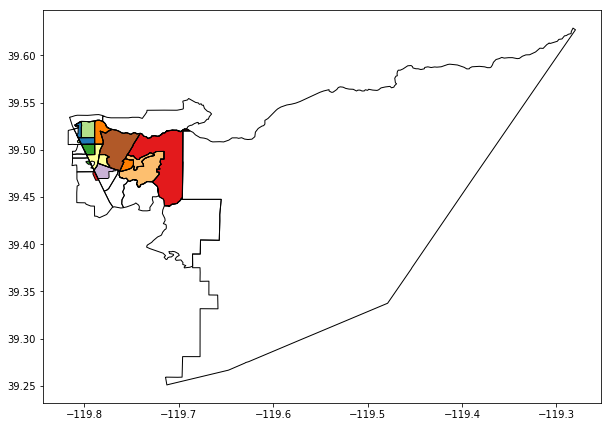

In [130]:
ax = intersection2[intersection2.ZCTA5CE10 == "89502"].plot(figsize=(10,10), cmap='Paired', edgecolor='black')
nevada[nevada.GEOID.isin(intersection2[intersection2.ZCTA5CE10 == "89502"].GEOID)].plot(ax=ax, facecolor='none', edgecolor='black')

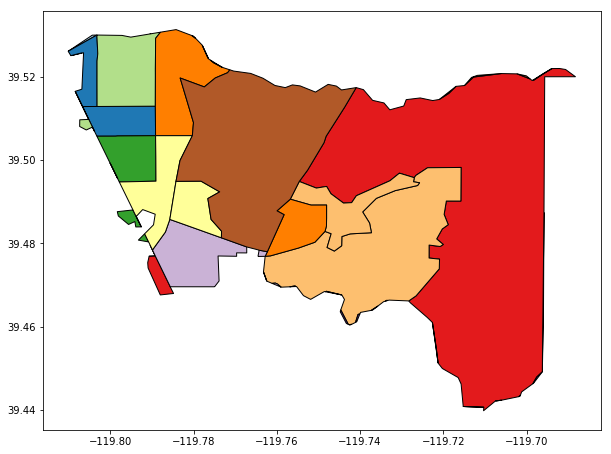

In [131]:
intersection2[intersection2.ZCTA5CE10 == "89502"].plot(figsize=(10,10), cmap='Paired', edgecolor='black')

In [132]:
intersection2["intersection_area"] = kmsq(intersection2)
intersection2["pct_tract_in_zip"] = intersection2.intersection_area / intersection2.zip_area
intersection2["pct_zip_in_tract"] = intersection2.intersection_area / intersection2.tract_area

In [221]:
intersection2.groupby("GEOID").pct_zip_in_tract.sum()[intersection2.groupby("GEOID").pct_zip_in_tract.sum() < .99]

GEOID
32001950100    0.283012
32001950500    0.800149
32001950600    0.257582
32001950700    0.505466
32003005437    0.898788
32003005613    0.722286
32003005703    0.727575
32003005711    0.304939
32003005827    0.740197
32003005902    0.588978
32003006104    0.687033
32003006204    0.849981
32003007200    0.561065
32003007600    0.396267
32003007800    0.267091
32005002300    0.347083
32005002400    0.803912
32005990000    0.000646
32007950200    0.643813
32007950702    0.848650
32007951202    0.455725
32007951500    0.480895
32007951600    0.237542
32007951700    0.401720
32009950100    0.345755
32011000100    0.514550
32013010500    0.621090
32013010600    0.445737
32015000300    0.849891
32017950100    0.550747
32017950200    0.645921
32019960201    0.591246
32019960202    0.297255
32019960800    0.844460
32019960900    0.700185
32021970700    0.484888
32021970800    0.347097
32023960100    0.394149
32023960200    0.192042
32023960300    0.408051
32023960401    0.790621
3202398050

In [215]:
intersection2.groupby("ZCTA5CE10").pct_tract_in_zip.sum()

ZCTA5CE10
89001    1.000000
89002    1.000000
89003    1.000000
89004    1.000000
89005    1.000000
89007    1.000000
89008    1.000000
89010    0.963795
89011    1.000000
89012    0.999998
89013    1.000000
89014    1.000000
89015    1.000000
89017    1.000000
89018    1.000000
89019    0.564922
89020    1.000000
89021    1.000000
89022    1.000000
89025    1.000000
89026    1.000000
89027    1.000000
89029    1.000015
89030    1.000000
89031    1.000000
89032    1.000000
89039    1.000000
89040    1.000000
89042    1.000000
89043    1.000000
           ...   
89508    1.000000
89509    0.999998
89510    1.000000
89511    1.000000
89512    1.000000
89519    1.000000
89521    1.000000
89523    1.000000
89701    1.000000
89702    1.000000
89703    1.000000
89704    1.000000
89705    1.000000
89706    1.000000
89801    1.000000
89815    1.000000
89820    1.000000
89821    1.000000
89822    1.000000
89823    1.000000
89825    1.000000
89826    1.000000
89828    1.000000
89830    1.000000


In [140]:
def calc_individual_donors(df):
    individ = df.groupby(['fec_id', 'zip5', 'contributor_last_name', 'contributor_first_name']).first().groupby(['fec_id', 'zip5']).count().reset_index()
    individ.rename(columns={"form_type": "donor_count"}, inplace=True)
    return individ[["fec_id", "zip5", "donor_count"]]

#bernie_df = pd.read_csv("data/fec/bernie.csv", dtype=str)
#bernie_df["zip5"] = bernie_df.contributor_zip_code.str[0:5]
candidates_df["zip5"] = candidates_df.contributor_zip_code.str[0:5]
individ = calc_individual_donors(candidates_df)

merged = intersection2.merge(individ[["zip5", "donor_count", "fec_id"]], how='left', left_on="ZCTA5CE10", right_on="zip5")
merged.donor_count = merged.donor_count.fillna(0)
merged = merged.to_crs(nevada.crs)

merged["donors_by_tract"] = (merged.donor_count * merged.pct_tract_in_zip).map(lambda x: round(x))

In [177]:
grouped = merged.groupby(["GEOID", "fec_id"]).donors_by_tract.sum()
max_candidate = grouped[(grouped / grouped.groupby("GEOID").sum()).groupby("GEOID").idxmax().dropna()].reset_index()

In [188]:
nv_donors.fec_id.unique()

array(['C00696948', 'C00693234', nan, 'C00695510', 'C00694455',
       'C00699090', 'C00659938', 'C00697441', 'C00693044', 'C00703975'],
      dtype=object)

In [207]:
pct_of_tract = grouped / grouped.groupby("GEOID").sum()
max_cand_pct = pct_of_tract[pct_of_tract.groupby("GEOID").idxmax().dropna()].reset_index()

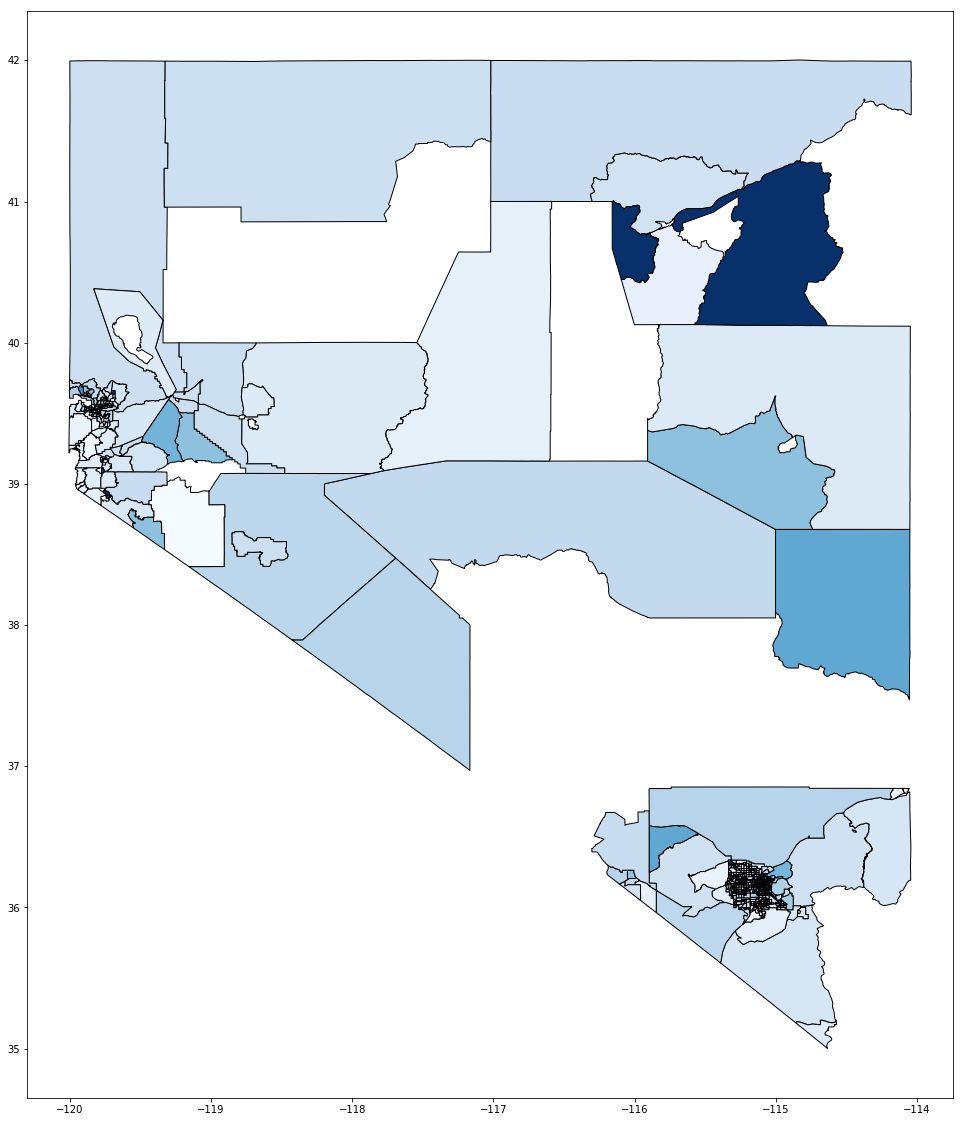

In [225]:
nv_donors = nevada.merge(max_cand_pct, how='left', on='GEOID')
nv_donors[nv_donors.fec_id == "C00696948"].plot("donors_by_tract", cmap='Blues', figsize=(20, 20), edgecolor='black')